#                                            PRODUCTION ENGINEERING I 
##                                           *OIL & GAS SEPARATORS*

***

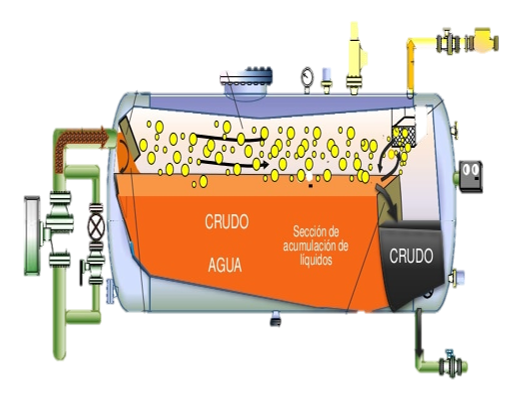\
*Figure 1.* Multiphase Separator

# 1. Import Python Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from math import isclose, sqrt
from PIL import Image

In [23]:
%config Completer.use_jedi = False

# 2. Useful Functions

In [24]:
# Function to show figures without axes
def figures(file):
    fig, ax = plt.subplots(figsize=(15,10))
    fig = img.imread(file)
    ax.imshow(fig)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

# 3. Types of Separators

## 3.1. **Vertical Two-Phase Separators**

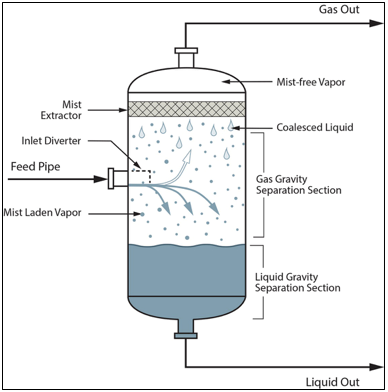\
*Figure 2.* Vertical Thwo-phase separator

In [25]:
# Function to size a two-phase vertical separator
def separator_bif_vertical(qg, ql, Api, sg_gas, P, T, z, dm, u):
    pho_l = 62.4 * (141.5 / (131.5 + Api))
    pho_g = 2.7 * sg_gas * P / (z * (T + 460))
    cd = 0.34
    df = pd.DataFrame()
    # Iterate until the cd value converge
    while True:
        vt = 0.0119 * ((pho_l - pho_g) / pho_g * (dm / cd))**0.5
        re = (0.0049 * pho_g * dm * vt) / u
        cd_cal = 24 / re + 3 / re**0.5 + 0.34
        df1 = pd.DataFrame({'cd':[cd], 'Vt':[vt], 'Re':[re], 'Cd_cal':[cd_cal]})
        df = pd.concat([df, df1])
        cd = cd_cal
        row = np.array(df.iloc[-1, :])
        if isclose(row[0], row[-1], abs_tol=0.001) is True:
            break
    print(f" Iterations Table: \n{df}")
    cd = df.iloc[-1, -1]
    d_min = sqrt(5040 * (((T + 460) * z * qg) / P) *\
                 ((pho_g / (pho_l - pho_g)) * (cd / dm))**0.5)
    tr = [3, 2, 1]
    dia = [24, 30, 36, 42, 48]
    tabla = pd.DataFrame()
    # Looping to create results table
    for t in tr:
        for diam in dia:
            tabla1 = pd.DataFrame({'tr(min)': [t], 'd(in)': [diam]})
            tabla = pd.concat([tabla, tabla1])
    tabla['h(in)'] = (tabla['tr(min)'] * ql) / (tabla['d(in)']**2 * 0.12)
    tabla['Lss(ft)'] = np.where(tabla['d(in)'] <= 36, (tabla['h(in)'] + 76) / 12, \
                                (tabla['h(in)'] + tabla['d(in)'] + 40) / 12)
    tabla['12LSS/d'] = (12 * tabla['Lss(ft)']) / tabla['d(in)']
    print(f"\nResults Table: \n {tabla}")
    print("\nOptimal Results Table: \n Engineers must select a diameter greater than\
    the minimum diameter as well as a slenderness radius between 3 and 4")
    # Slice the results table, considering conditions to get the best dimension of the separator
    tabla_res = tabla.loc[(tabla['d(in)'] > d_min)\
                          & (tabla['12LSS/d'] > 3) & (tabla['12LSS/d'] < 4)]
    return tabla_res

## *Exercise 1*

Size a **two-phase vertical separator**, operating under the following conditions:

In [26]:
# Data
qg = 10 #MMscfd
qo = 2000 #bpd
Api = 40
sg_gas = 0.6
P = 1000 #psia
T = 60 #F
Z = 0.84
dm = 140 #um
ug = 0.013 #cp

In [27]:
separator_bif_vertical(qg, qo, Api, sg_gas, P, T, Z, dm, ug)

 Iterations Table: 
         cd        Vt          Re    Cd_cal
0  0.340000  0.866681  169.618128  0.711843
0  0.711843  0.598972  117.224858  0.821819
0  0.821819  0.557456  109.099739  0.847199
0  0.847199  0.549042  107.453133  0.852762
0  0.852762  0.547249  107.102056  0.853968
0  0.853968  0.546862  107.026397  0.854229

Results Table: 
    tr(min)  d(in)      h(in)    Lss(ft)   12LSS/d
0        3     24  86.805556  13.567130  6.783565
0        3     30  55.555556  10.962963  4.385185
0        3     36  38.580247   9.548354  3.182785
0        3     42  28.344671   9.195389  2.627254
0        3     48  21.701389   9.141782  2.285446
0        2     24  57.870370  11.155864  5.577932
0        2     30  37.037037   9.419753  3.767901
0        2     36  25.720165   8.476680  2.825560
0        2     42  18.896447   8.408037  2.402296
0        2     48  14.467593   8.538966  2.134742
0        1     24  28.935185   8.744599  4.372299
0        1     30  18.518519   7.876543  3.150617
0   

,tr(min),d(in),h(in),Lss(ft),12LSS/d
0,3,36,38.580247,9.548354,3.182785
0,2,30,37.037037,9.419753,3.767901
0,1,30,18.518519,7.876543,3.150617


## 3.2. **Horizontal Two-Phase Separators**

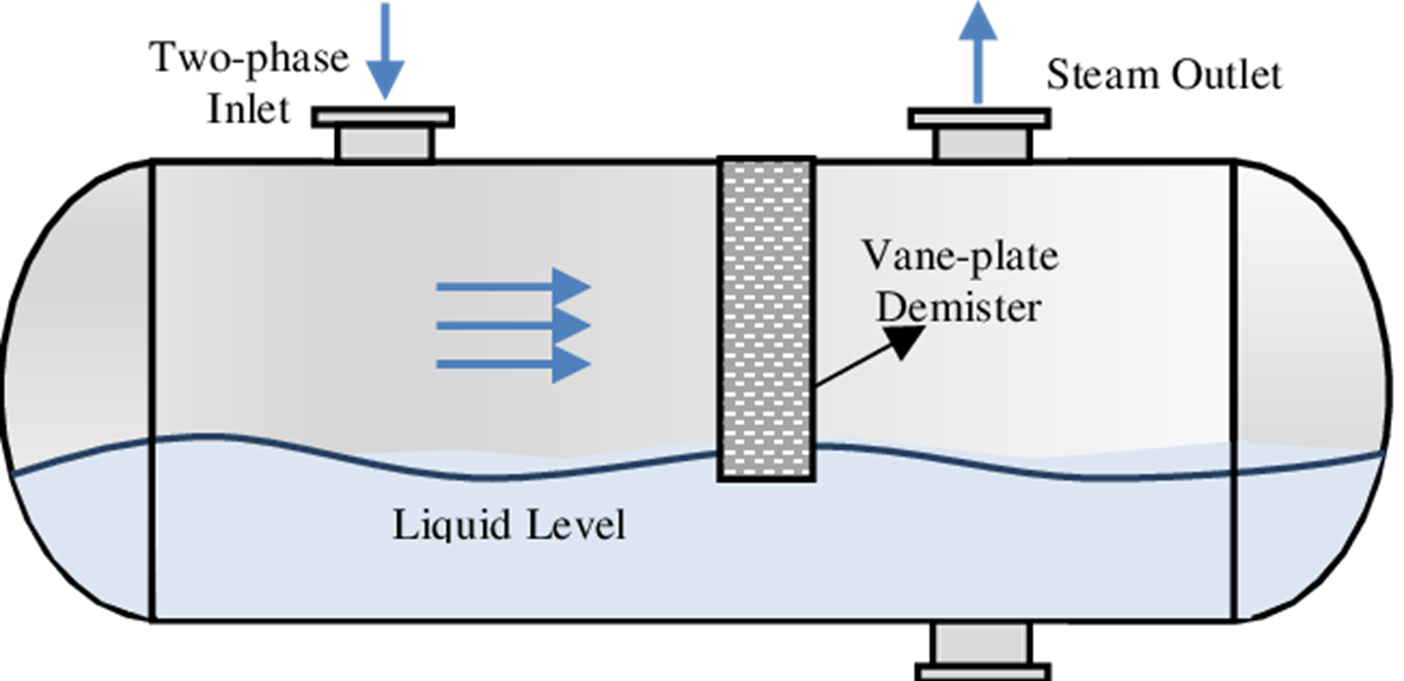\
*Figure 3*. Horizontal two-phase separator

In [28]:
# Function to size a two-phase horizontal separator
def separator_bif_horizontal(qg, ql, Api, sg_gas, P, T, z, dm, u, tr):
    pho_l = 62.4 * (141.5 / (131.5 + Api))
    pho_g = 2.7 * sg_gas * P / (z * (T + 460))
    cd = 0.34
    df = pd.DataFrame()
    # Iterate until the cd value converge
    while True:
        vt = 0.0119 * ((pho_l - pho_g) / pho_g * (dm / cd))**0.5
        re = (0.0049 * pho_g * dm * vt) / u
        cd_cal = 24 / re + 3 / re**0.5 + 0.34
        df1 = pd.DataFrame({'cd':[cd], 'Vt':[vt], 'Re':[re], 'Cd_cal':[cd_cal]})
        df = pd.concat([df, df1])
        cd = cd_cal
        row = np.array(df.iloc[-1, :])
        if isclose(row[0], row[-1], abs_tol=0.001) is True:
            break
    print(f" Iterations Table: \n{df}")
    cd = df.iloc[-1, -1]
    dLeff = 420 * (((T + 460) * z * qg) / P) *\
    ((pho_g / (pho_l - pho_g)) * (cd / dm))**0.5
    tr = [tr]
    dia = [24, 30, 36, 42, 48]
    tabla = pd.DataFrame()
    # Looping to create results table
    for t in tr:
        for diam in dia:
            tabla1 = pd.DataFrame({'tr(min)': [t], 'd(in)': [diam]})
            tabla = pd.concat([tabla, tabla1])
    tabla['Gas_Leff(ft)'] = dLeff / tabla['d(in)']
    tabla['Liq_Leff(ft)'] = (tabla['tr(min)'] * 2000) / (tabla['d(in)']**2 * 0.7)
    tabla['Lss(ft)'] = np.where(tabla['Gas_Leff(ft)'] > tabla['Liq_Leff(ft)'],\
                                tabla['Gas_Leff(ft)'] + (tabla['d(in)'] / 12),\
                                (4 / 3) * tabla['Liq_Leff(ft)'])
    tabla['12LSS/d'] = (12 * tabla['Lss(ft)']) / tabla['d(in)']
    print(f"\nResults Table: \n {tabla}")
    print("\nOptimal Results Table: \n Engineers must select a slenderness radius between 3 and 4")
    # Slice the results table, considering conditions to get the best dimension of the separator
    tabla_res = tabla.loc[(tabla['12LSS/d'] > 2.9) & (tabla['12LSS/d'] < 4)]
    return tabla_res

## *Exercise 2*

Size a **two-phase horizontal separator**, operating under the following conditions:

In [29]:
# Data
qg = 10 #MMscfd
qo = 2000 #bpd
Api = 40
sg_gas = 0.6
P = 1000 #psia
T = 60 #F
Z = 0.84
dm = 140 #um
ug = 0.013 #cp
tr = 3 #min

In [30]:
separator_bif_horizontal(qg, qo, Api, sg_gas, P, T, Z, dm, ug, tr)

 Iterations Table: 
         cd        Vt          Re    Cd_cal
0  0.340000  0.866681  169.618128  0.711843
0  0.711843  0.598972  117.224858  0.821819
0  0.821819  0.557456  109.099739  0.847199
0  0.847199  0.549042  107.453133  0.852762
0  0.852762  0.547249  107.102056  0.853968
0  0.853968  0.546862  107.026397  0.854229

Results Table: 
    tr(min)  d(in)  Gas_Leff(ft)  Liq_Leff(ft)    Lss(ft)   12LSS/d
0        3     24      1.663628     14.880952  19.841270  9.920635
0        3     30      1.330902      9.523810  12.698413  5.079365
0        3     36      1.109085      6.613757   8.818342  2.939447
0        3     42      0.950645      4.859086   6.478782  1.851081
0        3     48      0.831814      3.720238   4.960317  1.240079

Optimal Results Table: 
 Engineers must select a slenderness radius between 3 and 4


,tr(min),d(in),Gas_Leff(ft),Liq_Leff(ft),Lss(ft),12LSS/d
0,3,36,1.109085,6.613757,8.818342,2.939447


## 3.3. **Vertical Three-Phase Separators**

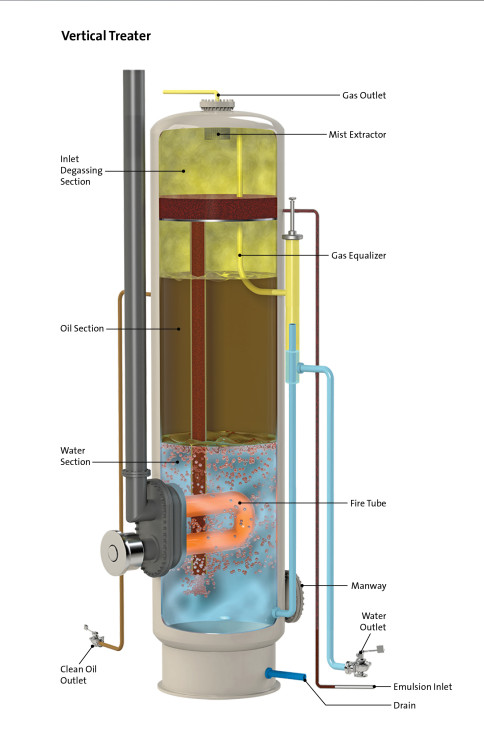\
*Figure 4.* Vertical three-phase separator

In [31]:
# Function to size a two-phase vertical separator
def separator_trif_vertical(qg, qo, qw, Api, sg_gas, sg_w, P, T, z, uo, uw, ug,
                            tro, trw, dm_g=100, dm_o=200, dm_w=500):
    pho_o = 62.4 * (141.5 / (131.5 + Api))
    pho_g = 2.7 * sg_gas * P / (z * (T + 460))
    delta_SG = 1.07 - (141.5 / (Api + 131.5))
    cd = 0.34
    df = pd.DataFrame()
    # Iterate until the cd value converge
    while True:
        vt = 0.0119 * ((pho_o - pho_g) / pho_g * (dm_g / cd))**0.5
        re = (0.0049 * pho_g * dm_g * vt) / ug
        cd_cal = 24 / re + 3 / re**0.5 + 0.34
        df1 = pd.DataFrame({'cd':[cd], 'Vt':[vt], 'Re':[re], 'Cd_cal':[cd_cal]})
        df = pd.concat([df, df1])
        cd = cd_cal
        row = np.array(df.iloc[-1, :])
        if isclose(row[0], row[-1], abs_tol=0.001) is True:
            break
    print(f" Iterations Table: \n{df}")
    cd = df.iloc[-1, -1]
    d_min_gas = sqrt(5040 * (((T + 460) * z * qg) / P) * \
                     ((pho_g / (pho_o - pho_g)) * (cd / dm_g))**0.5)
    d_min_oil = sqrt(6690 * ((qo * uo)) / ((dm_w)**2 * (delta_SG)))
    d_min_water = sqrt(6690 * ((qw * uw)) / ((dm_o)**2 * (delta_SG)))
    d_min = round(max([d_min_gas, d_min_oil, d_min_water]))
    df = pd.DataFrame()
    df['d(in)'] = np.arange(d_min + 1, d_min + 20, 6)
    df['h_liq(in)'] = (tro * qo + trw * qw) / (0.12 * df['d(in)']**2)
    df['Lss(ft)'] = np.where(df['d(in)'] <= 36, (df['h_liq(in)'] + 76) / 12,\
                             (df['h_liq(in)'] + df['d(in)'] + 40) / 12)
    df['SR'] = (12 * df['Lss(ft)']) / df['d(in)']
    print("\nOptimal Results Table:\n Engineers must select a slenderness radius between 1.5 and 3")
    return df

## *Exercise 3*

Size a **three-phase vertical separator**, operating under the following conditions:

In [32]:
# Data
qg = 5 #MMscfd
qo = 5000 #bpd
qw = 3000 #bpd
Api = 30
sg_gas = 0.6
sg_w = 1.07
P = 100 #psia
T = 90 #F
Z = 0.99
uo = 10 #cp
uw= 1 #cp
ug = 0.013 #cp
tro = 10 #min
trw = 10 #min

In [33]:
separator_trif_vertical(qg, qo, qw, Api, sg_gas, sg_w, P, T, Z, uo, uw, ug, tro, trw)

 Iterations Table: 
         cd        Vt         Re    Cd_cal
0  0.340000  2.758978  30.939845  1.655038
0  1.655038  1.250500  14.023408  2.852538
0  2.852538  0.952515  10.681736  3.504736
0  3.504736  0.859330   9.636735  3.796869
0  3.796869  0.825610   9.258589  3.918124
0  3.918124  0.812734   9.114199  3.966969
0  3.966969  0.807715   9.057914  3.986415
0  3.986415  0.805743   9.035795  3.994120
0  3.994120  0.804965   9.027074  3.997168
0  3.997168  0.804658   9.023632  3.998372
0  3.998372  0.804537   9.022273  3.998848

Optimal Results Table:
 Engineers must select a slenderness radius between 1.5 and 3


,d(in),h_liq(in),Lss(ft),SR
0,84,94.482237,18.206853,2.600979
1,90,82.304527,17.692044,2.358939
2,96,72.337963,17.361497,2.170187
3,102,64.077919,17.173160,2.020372


## 3.4. **Horizontal Three-Phase Separators**

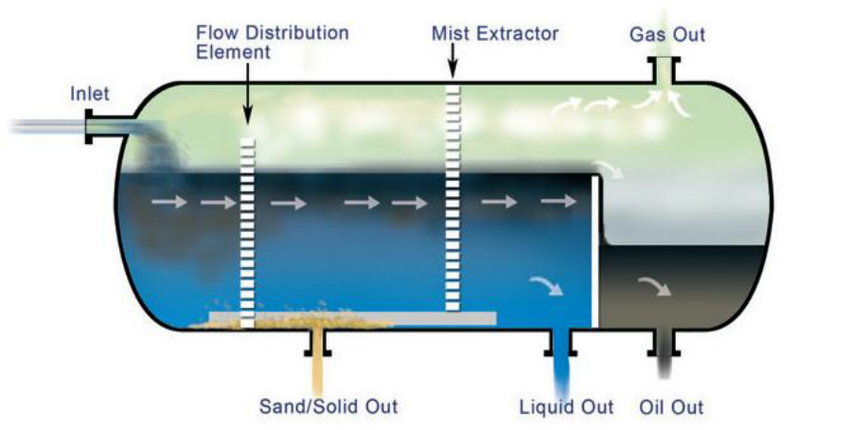\
*Figure 5* Horizontal three-phase separator

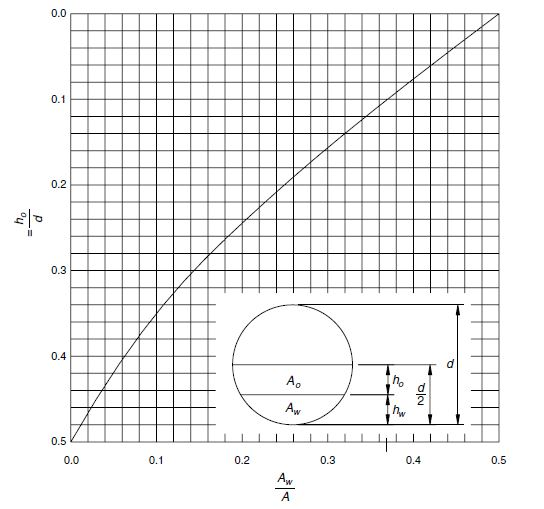\
*Figure 6.* coefficient beta = $\frac{h_{o}}{d}$

In [34]:
# Function to size a three-phase horizontal separator
def separator_trif_horizontal(qg, qo, qw, Api, sg_gas, sq_w, P, T, Z, uo, uw, ug,
                              tro, trw, dm_g=100, dm_o=200, dm_w=500):
    pho_o = 62.4 * (141.5 / (131.5 + Api))
    pho_g = 2.7 * sg_gas * P / (Z * (T + 460))
    # Calculate difference in specific gravities
    sg_o = 141.5 / (Api + 131.5)
    delta_sg = sg_w -  sg_o
    cd = 0.34
    df = pd.DataFrame()
    # Iterate until the cd value converges
    while True:
        vt = 0.0119 * ((pho_o - pho_g) / pho_g * (dm_g / cd))**0.5
        re = (0.0049 * pho_g * dm_g * vt) / ug
        cd_cal = 24 / re + 3 / re**0.5 + 0.34
        df1 = pd.DataFrame({'cd':[cd], 'Vt':[vt], 'Re':[re], 'Cd_cal':[cd_cal]})
        df = pd.concat([df, df1])
        cd = cd_cal
        row = np.array(df.iloc[-1, :])
        if isclose(row[0], row[-1], abs_tol=0.001) is True:
            break
    print(f" Iterations Table: \n{df}")
    cd = df.iloc[-1, -1]
    # Calculate maximum oil pad thickness (ho_max)
    ho_max = 1.28E-3 * (tro * delta_sg * dm_w**2 / 10)
    # Calculate Aw/A
    Aw_A = 0.5 * ((qw * trw) / (tro * qo + trw * qw))
    # Determine beta from the figure using the AW/A value
    fig = figures('beta.JPG')
    beta = float(input(f'Enter the value of beta read from figure 6. If AW/A is {Aw_A}->'))
    # Calculate dmax
    d_max = ho_max / beta
    dLeff =  420 * (((T + 460) * Z * qg) / P) *\
    ((pho_g / (pho_o - pho_g)) * (cd / dm_g))**0.5
    # Calculate combinations of d, Leff for d less than dmax to satisfy the oil and water time constraints
    d2Leff = 1.42 * (qw * trw + qo * trw)
    # Create resulst table
    tabla = pd.DataFrame()
    tabla['d(in)'] = np.arange(60, d_max + 1, 12)
    tabla['Gas_Leff(ft)'] =  dLeff / tabla['d(in)']
    tabla['Liq_Leff(ft)'] = d2Leff / tabla['d(in)']**2
    tabla['Lss(ft)'] = np.where(tabla['Gas_Leff(ft)'] > tabla['Liq_Leff(ft)'],\
                                tabla['Gas_Leff(ft)'] + (tabla['d(in)'] / 12),\
                                (4 / 3) * tabla['Liq_Leff(ft)'])
    tabla['SR'] = (12 * tabla['Lss(ft)']) / tabla['d(in)']
    tabla_res = tabla.loc[tabla['SR'] > 3]
    print(f"\nResults Table: \n {tabla}")
    print("\nOptimal Results Table:\n Engineers must select a slenderness radius between 3 and 5")
    return tabla_res

## *Exercise 4*

Size a **three-phase horizontal separator**, operating under the following conditions:

In [35]:
# Data
qg = 5 #MMscfd
qo = 5000 #bpd
qw = 3000 #bpd
Api = 30
sg_gas = 0.6
sg_w = 1.07
P = 100 #psia
T = 90 #F
Z = 0.99
uo = 10 #cp
uw= 1 #cp
ug = 0.013 #cp
tro = 10 #min
trw = 10 #min

 Iterations Table: 
         cd        Vt         Re    Cd_cal
0  0.340000  2.758978  30.939845  1.655038
0  1.655038  1.250500  14.023408  2.852538
0  2.852538  0.952515  10.681736  3.504736
0  3.504736  0.859330   9.636735  3.796869
0  3.796869  0.825610   9.258589  3.918124
0  3.918124  0.812734   9.114199  3.966969
0  3.966969  0.807715   9.057914  3.986415
0  3.986415  0.805743   9.035795  3.994120
0  3.994120  0.804965   9.027074  3.997168
0  3.997168  0.804658   9.023632  3.998372
0  3.998372  0.804537   9.022273  3.998848


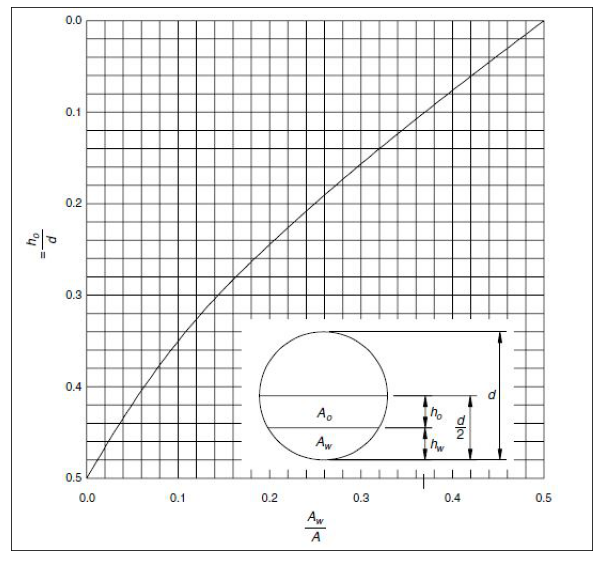

Enter the value of beta read from figure 6. If AW/A is 0.1875-> 0.257



Results Table: 
     d(in)  Gas_Leff(ft)  Liq_Leff(ft)    Lss(ft)        SR
0    60.0      2.818984     31.555556  42.074074  8.414815
1    72.0      2.349153     21.913580  29.218107  4.869684
2    84.0      2.013560     16.099773  21.466364  3.066623
3    96.0      1.761865     12.326389  16.435185  2.054398
4   108.0      1.566102      9.739369  12.985825  1.442869
5   120.0      1.409492      7.888889  10.518519  1.051852
6   132.0      1.281356      6.519743   8.692991  0.790272
7   144.0      1.174577      5.478395   7.304527  0.608711
8   156.0      1.084225      4.667982   6.223975  0.478767
9   168.0      1.006780      4.024943   5.366591  0.383328
10  180.0      0.939661      3.506173   4.674897  0.311660
11  192.0      0.880933      3.081597   4.108796  0.256800
12  204.0      0.829113      2.729719   3.639626  0.214096
13  216.0      0.783051      2.434842   3.246456  0.180359
14  228.0      0.741838      2.185288   2.913717  0.153354
15  240.0      0.704746      1.972222 

,d(in),Gas_Leff(ft),Liq_Leff(ft),Lss(ft),SR
0,60.0,2.818984,31.555556,42.074074,8.414815
1,72.0,2.349153,21.913580,29.218107,4.869684
2,84.0,2.013560,16.099773,21.466364,3.066623


In [36]:
separator_trif_horizontal(qg, qo, qw, Api, sg_gas, sg_w, P, T, Z, uo, uw, ug, tro, trw)